### This script was used when developing the 'build_model' function.  

Here we develop the steps necessary to subsample/interpolate the variables in a IsophoteList. This is a necessary step before running the loop in the build_model function, to ensure the pixel array will be covered without leaving gaps in between successive ellipses. 

In [1]:
from astropy.io import fits
from ellipse.ellipse import Ellipse

image_data = fits.open("../../test/data/M51.fits")
image = image_data[0].data
ellipse = Ellipse(image)
isolist = ellipse.fit_image()

Centering on object....   Done. Found x0 = 257.0, y0 = 258.0
#
# Semi-      Isophote         Ellipticity    Position     Grad.   Data  Flag Iter. Stop
# major        mean                           Angle        rel.                    code
# axis       intensity                                    error
#(pixel)                                     (degree)
#


/Users/busko/Projects/isophote/ellipse/centerer.py:116: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  window = self._image[j1:j2,i1:i2]


  10.00     1072.63 ( 8.60)  0.053 (0.006)  55.92 ( 3.5)  0.187    61     0   50     2
  11.00     1045.82 ( 8.05)  0.134 (0.005)  74.19 ( 1.1)  0.156    64     0   10     0
  12.10      988.86 ( 7.29)  0.157 (0.004)  68.21 ( 0.8)  0.158    70     0   10     0
  13.31      926.00 ( 8.37)  0.157 (0.006)  52.59 ( 1.3)  0.239    76     0   50     2
  14.64      875.83 ( 8.63)  0.157 (0.012)  52.59 ( 2.3)  0.257    84     0    3     5
  16.11      902.36 ( 7.87)  0.301 (0.005)  48.38 ( 0.5)  0.233    84     0   13     0
  17.72      886.78 ( 8.35)  0.358 (0.003)  50.53 ( 0.3)  0.146    88     0   10     0
  19.49      756.83 ( 7.57)  0.179 (0.002)  35.18 ( 0.4)  0.111   110     0   10     0
  21.44      681.99 ( 7.66)  0.211 (0.003)  35.78 ( 0.4)  0.153   119     0   10     0
  23.58      667.47 ( 9.59)  0.282 (0.002)  38.89 ( 0.3)  0.113   124     0   10     0
  25.94      525.38 ( 6.51)  0.226 (0.002)  41.16 ( 0.3)  0.099   142     0   10     0
  28.53      538.62 ( 7.47)  0.311 (0.002) 

Now we interpolate using univariate splines. This should approximate what the old STSDAS task did.

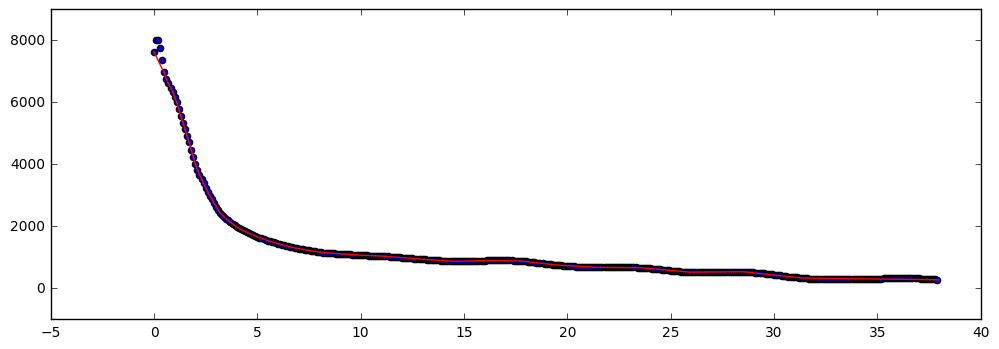

In [2]:
from scipy.interpolate import UnivariateSpline 
import numpy as np

# a small amount of smoothing seems necessary
smoothing_factor = 1.E-8*len(isolist.sma)

interpolator = UnivariateSpline(isolist.sma, isolist.intens, s=smoothing_factor)

finely_spaced_sma = np.arange(isolist[0].sma, isolist[-1].sma, 0.1)

intens = interpolator(finely_spaced_sma)

import matplotlib.pyplot as plt
%matplotlib inline

plt.gcf().set_size_inches(12.,4.)
plt.plot(isolist.sma, isolist.intens, 'red')
plt.scatter(finely_spaced_sma, intens)

In [3]:
interpolator = UnivariateSpline(isolist.sma, isolist.eps, s=smoothing_factor)
eps = interpolator(finely_spaced_sma)

/Users/busko/Projects/miniconda3/lib/python3.5/site-packages/scipy/interpolate/fitpack2.py:222: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [4]:
interpolator = UnivariateSpline(isolist.sma, isolist.pa, s=smoothing_factor)
pa = interpolator(finely_spaced_sma)

In [5]:
interpolator = UnivariateSpline(isolist.sma, isolist.x0, s=smoothing_factor)
x0 = interpolator(finely_spaced_sma)

In [6]:
interpolator = UnivariateSpline(isolist.sma, isolist.y0, s=smoothing_factor)
y0 = interpolator(finely_spaced_sma)

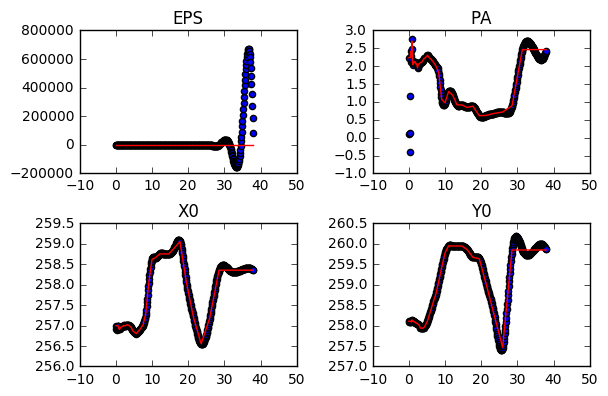

In [7]:
plt.figure(1)

plt.subplot(221)
plt.plot(isolist.sma, isolist.eps, 'red')
plt.scatter(finely_spaced_sma, eps)
plt.title('EPS')

plt.subplot(222)
plt.plot(isolist.sma, isolist.pa, 'red')
plt.scatter(finely_spaced_sma, pa)
plt.title('PA')

plt.subplot(223)
plt.plot(isolist.sma, isolist.x0, 'red')
plt.scatter(finely_spaced_sma, x0)
plt.title('X0')

plt.subplot(224)
plt.plot(isolist.sma, isolist.y0, 'red')
plt.scatter(finely_spaced_sma, y0)
plt.title('Y0')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

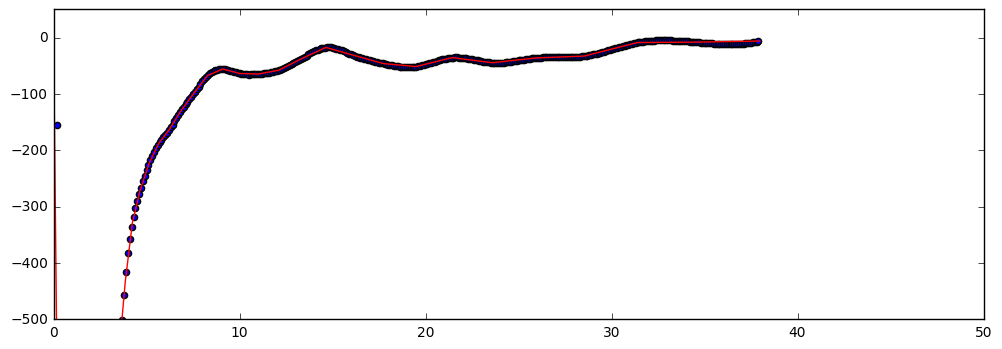

In [8]:
interpolator = UnivariateSpline(isolist.sma[1:], isolist.grad[1:], s=smoothing_factor) # discard central point
grad = interpolator(finely_spaced_sma)
plt.gcf().set_size_inches(12.,4.)
plt.axis([0.,50.,-500.,50.])
plt.plot(isolist.sma, isolist.grad, 'red')
plt.scatter(finely_spaced_sma, grad)

In [9]:
interpolator = UnivariateSpline(isolist.sma[1:], isolist.a3[1:], s=smoothing_factor)
a3 = interpolator(finely_spaced_sma)
interpolator = UnivariateSpline(isolist.sma[1:], isolist.b3[1:], s=smoothing_factor)
b3 = interpolator(finely_spaced_sma)
interpolator = UnivariateSpline(isolist.sma[1:], isolist.a4[1:], s=smoothing_factor)
a4 = interpolator(finely_spaced_sma)
interpolator = UnivariateSpline(isolist.sma[1:], isolist.b4[1:], s=smoothing_factor)
b4 = interpolator(finely_spaced_sma)

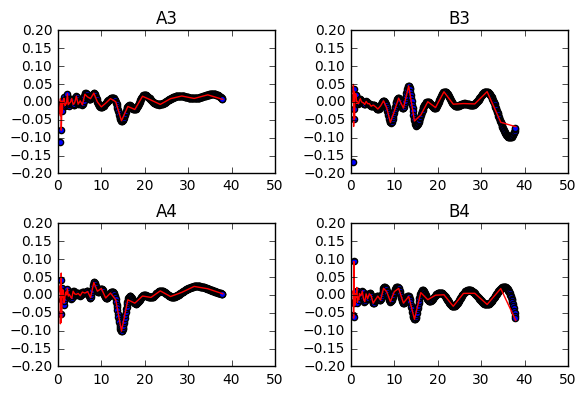

In [10]:
plt.figure(1)

plt.subplot(221)
plt.axis([0.,50.,-0.2,0.2])
plt.plot(isolist.sma, isolist.a3, 'red')
plt.scatter(finely_spaced_sma, a3)
plt.title('A3')

plt.subplot(222)
plt.axis([0.,50.,-0.2,0.2])
plt.plot(isolist.sma, isolist.b3, 'red')
plt.scatter(finely_spaced_sma, b3)
plt.title('B3')

plt.subplot(223)
plt.axis([0.,50.,-0.2,0.2])
plt.plot(isolist.sma, isolist.a4, 'red')
plt.scatter(finely_spaced_sma, a4)
plt.title('A4')

plt.subplot(224)
plt.axis([0.,50.,-0.2,0.2])
plt.plot(isolist.sma, isolist.b4, 'red')
plt.scatter(finely_spaced_sma, b4)
plt.title('B4')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

The UnivariateSpline fit doesn't work well. In most cases it seems to be OK, but the EPS parameter got too unstable. 

Lets try the LSQUnivariateSpline interpolator instead. With tis one, at least we have control on where the nodes are. That should help in coercing the inerpolated values into the valid range.

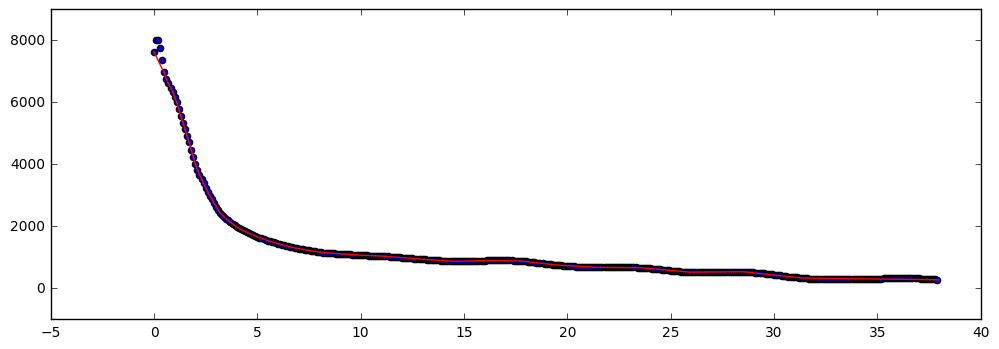

In [11]:
from scipy.interpolate import LSQUnivariateSpline

# End points must be discarded, but how many? This seems to work well for this example
nodes = isolist.sma[2:-2]

intens = LSQUnivariateSpline(isolist.sma, isolist.intens, nodes)(finely_spaced_sma)
eps    = LSQUnivariateSpline(isolist.sma, isolist.eps,    nodes)(finely_spaced_sma)
pa     = LSQUnivariateSpline(isolist.sma, isolist.pa,     nodes)(finely_spaced_sma)
x0     = LSQUnivariateSpline(isolist.sma, isolist.x0,     nodes)(finely_spaced_sma)
y0     = LSQUnivariateSpline(isolist.sma, isolist.y0,     nodes)(finely_spaced_sma)

plt.gcf().set_size_inches(12.,4.)
plt.plot(isolist.sma, isolist.intens, 'red')
plt.scatter(finely_spaced_sma, intens)

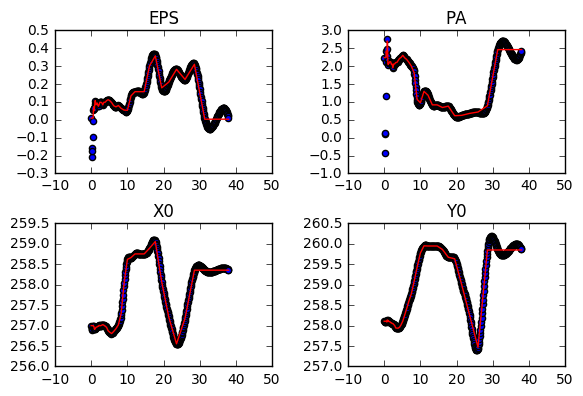

In [12]:
plt.figure(1)

plt.subplot(221)
plt.plot(isolist.sma, isolist.eps, 'red')
plt.scatter(finely_spaced_sma, eps)
plt.title('EPS')

plt.subplot(222)
plt.plot(isolist.sma, isolist.pa, 'red')
plt.scatter(finely_spaced_sma, pa)
plt.title('PA')

plt.subplot(223)
plt.plot(isolist.sma, isolist.x0, 'red')
plt.scatter(finely_spaced_sma, x0)
plt.title('X0')

plt.subplot(224)
plt.plot(isolist.sma, isolist.y0, 'red')
plt.scatter(finely_spaced_sma, y0)
plt.title('Y0')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

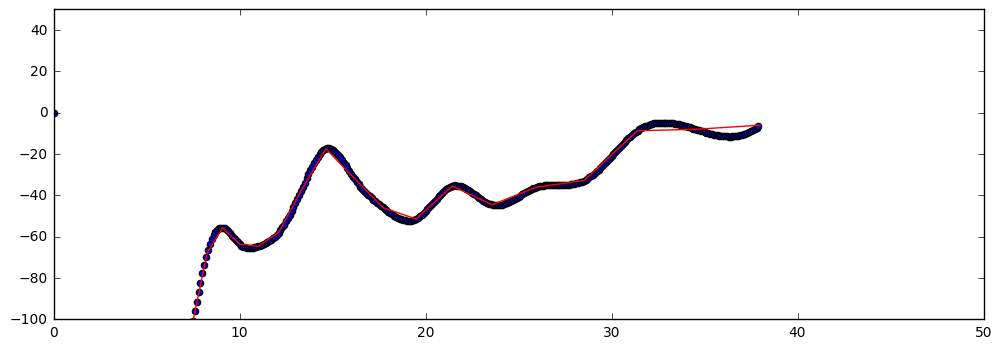

In [13]:
grad = LSQUnivariateSpline(isolist.sma, isolist.grad, nodes)(finely_spaced_sma)

plt.gcf().set_size_inches(12.,4.)
plt.axis([0.,50.,-100.,50.])
plt.plot(isolist.sma, isolist.grad, 'red')
plt.scatter(finely_spaced_sma, grad)

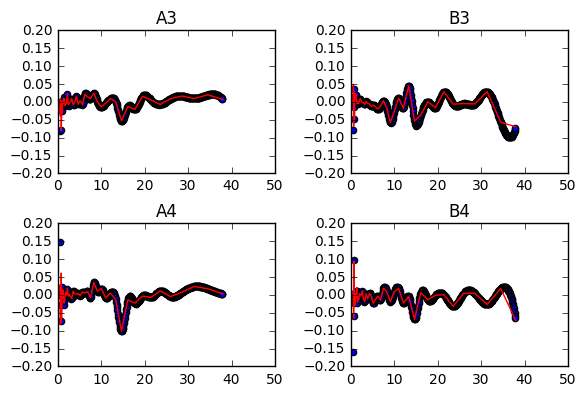

In [14]:
a3 = LSQUnivariateSpline(isolist.sma, isolist.a3, nodes)(finely_spaced_sma)
b3 = LSQUnivariateSpline(isolist.sma, isolist.b3, nodes)(finely_spaced_sma)
a4 = LSQUnivariateSpline(isolist.sma, isolist.a4, nodes)(finely_spaced_sma)
b4 = LSQUnivariateSpline(isolist.sma, isolist.b4, nodes)(finely_spaced_sma)

plt.figure(1)

plt.subplot(221)
plt.axis([0.,50.,-0.2,0.2])
plt.plot(isolist.sma, isolist.a3, 'red')
plt.scatter(finely_spaced_sma, a3)
plt.title('A3')

plt.subplot(222)
plt.axis([0.,50.,-0.2,0.2])
plt.plot(isolist.sma, isolist.b3, 'red')
plt.scatter(finely_spaced_sma, b3)
plt.title('B3')

plt.subplot(223)
plt.axis([0.,50.,-0.2,0.2])
plt.plot(isolist.sma, isolist.a4, 'red')
plt.scatter(finely_spaced_sma, a4)
plt.title('A4')

plt.subplot(224)
plt.axis([0.,50.,-0.2,0.2])
plt.plot(isolist.sma, isolist.b4, 'red')
plt.scatter(finely_spaced_sma, b4)
plt.title('B4')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

Looks better, even though the EPS values sometimes run into the negative range. But it doesn't grow into values > 1, which is good. Negative values can be replaced by zero anyway.

So lets keep this solution in the build_model script.